<a href="https://colab.research.google.com/github/jzzy-jeff/github-slideshow/blob/master/audioPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q tensorflow-io

     |████████████████████████████████| 25.3MB 1.6MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_io as tfio

audio = tfio.audio.AudioIOTensor('gs://cloud-samples-tests/speech/brooklyn.flac')

print(audio)

<AudioIOTensor: shape=[28979     1], dtype=<dtype: 'int16'>, rate=16000>


In [ ]:
audio_slice = audio[100:]

#remove the last dimension
audio_tensor = tf.squeeze(audio_slice, axis=[-1])

print(audio_tensor)

tf.Tensor([16 39 66 ... 56 81 83], shape=(28879,), dtype=int16)


In [ ]:
from IPython.display import Audio
Audio(audio_tensor.numpy(), rate=audio.rate.numpy())

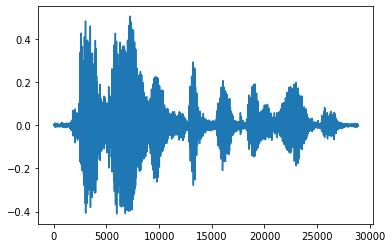

In [ ]:
import matplotlib.pyplot as plt

tensor = tf.cast(audio_tensor, tf.float32) / 32768.0

plt.figure()
plt.plot(tensor.numpy())

tf.Tensor(2398, shape=(), dtype=int64) tf.Tensor(23546, shape=(), dtype=int64)


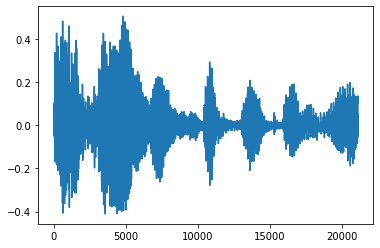

In [ ]:
position = tfio.experimental.audio.trim(tensor, axis=0, epsilon=0.1)

start = position[0]
stop = position[1]
print(start, stop)

processed = tensor[start:stop]

plt.figure()
plt.plot(processed.numpy())

In [ ]:
Audio(processed.numpy(), rate=audio.rate.numpy())

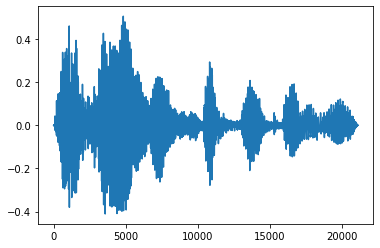

In [ ]:
fade = tfio.experimental.audio.fade(
    processed, fade_in=1000, fade_out=2000, mode="logarithmic")

plt.figure()
plt.plot(fade.numpy())

In [ ]:
Audio(fade.numpy(), rate=audio.rate.numpy())

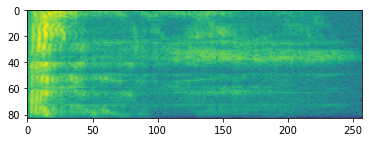

In [ ]:
#the spectre
# Convert to spectrogram
spectrogram = tfio.experimental.audio.spectrogram(
    fade, nfft=512, window=512, stride=256)

plt.figure()
plt.imshow(tf.math.log(spectrogram).numpy())

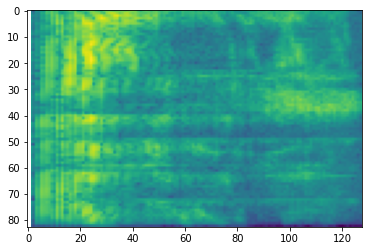

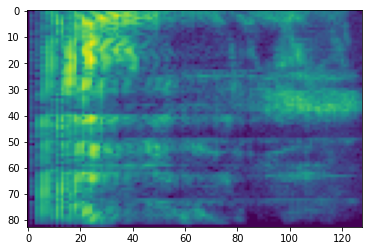

In [ ]:
# Convert to mel-spectrogram
mel_spectrogram = tfio.experimental.audio.melscale(
    spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)


plt.figure()
plt.imshow(tf.math.log(mel_spectrogram).numpy())

# Convert to db scale mel-spectrogram
dbscale_mel_spectrogram = tfio.experimental.audio.dbscale(
    mel_spectrogram, top_db=80)

plt.figure()
plt.imshow(dbscale_mel_spectrogram.numpy())

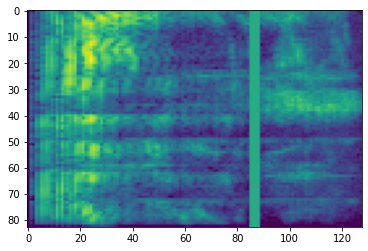

In [ ]:
#Frequency masking
freq_mask = tfio.experimental.audio.freq_mask(dbscale_mel_spectrogram, param=10)

plt.figure()
plt.imshow(freq_mask.numpy())

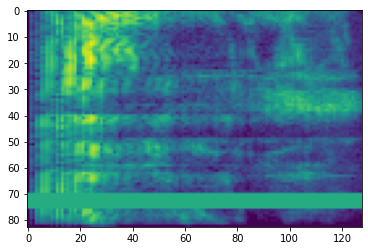

In [ ]:
#Time mask
time_mask = tfio.experimental.audio.time_mask(dbscale_mel_spectrogram, param=10)

plt.figure()
plt.imshow(time_mask.numpy())